In [1]:
#Basics
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Stats and Modeling
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

#Module
from wrangle import wrangle_zillow

## Scaling

#### Get Data

In [2]:
#get data and use split of 70/15/15
tr, te, val = wrangle_zillow(val_ratio=.15,test_ratio=.15)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470497 entries, 1528912 to 817023
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   value       1470497 non-null  float64
 1   county      1470497 non-null  object 
 2   bed         1470497 non-null  int64  
 3   bath        1470497 non-null  float64
 4   sf          1470497 non-null  float64
 5   yearbuilt   1470497 non-null  int64  
 6   Orange_CA   1470497 non-null  uint8  
 7   Ventura_CA  1470497 non-null  uint8  
dtypes: float64(3), int64(2), object(1), uint8(2)
memory usage: 81.3+ MB


#### Split data into modeling dataframes

In [4]:
#drop target and category columns for eda
X_tr = tr.iloc[:,2:-2]
#pull out target
y_tr = tr.iloc[:,0]

#repeat for test and validate
X_te = te.iloc[:,2:-2]
y_te = te.iloc[:,0]
X_val = val.iloc[:,2:-2]
y_val = val.iloc[:,0]

In [5]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470497 entries, 1528912 to 817023
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bed        1470497 non-null  int64  
 1   bath       1470497 non-null  float64
 2   sf         1470497 non-null  float64
 3   yearbuilt  1470497 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 56.1 MB


### Scaling
- Min/Max
- Standardization
- Robust

#### min/max scaling
Create X_train datasets for these

In [6]:
#MIN MAX SCALER
scaler = MinMaxScaler()
#Fit and transform train
X_tr_mm_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

#STANDARDIZATION SCALER
scaler = StandardScaler()
#Fit and transform train
X_tr_st_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)

##################

#ROBUST SCALER
scaler = RobustScaler()
#Fit and transform train
X_tr_r_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)

##################

#### Visualize the original X train vs the scaled versions

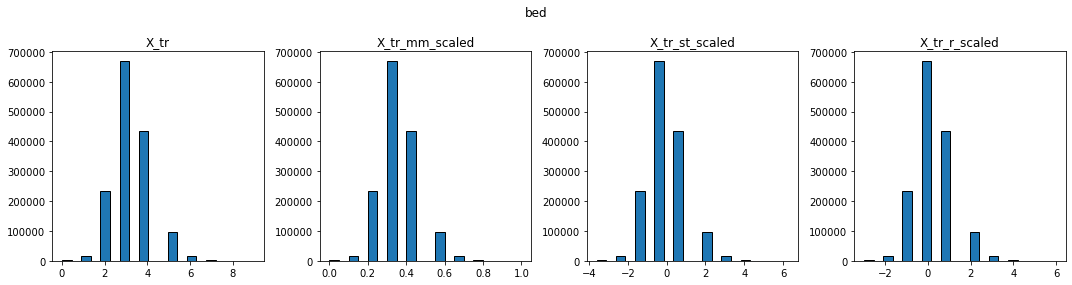

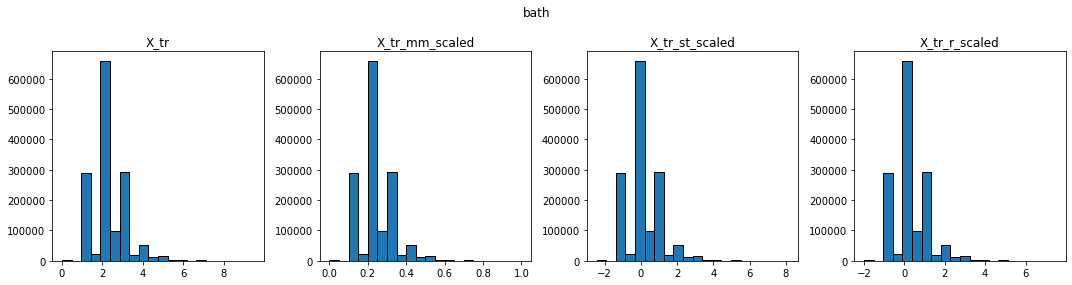

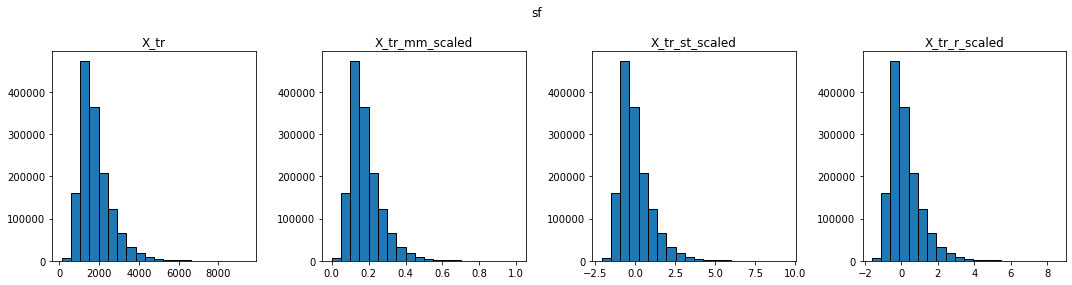

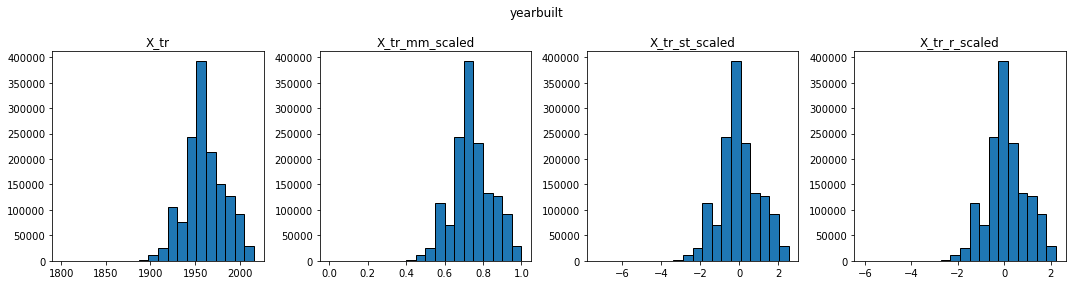

In [7]:
#values to loop over
lst = [X_tr, X_tr_mm_scaled, X_tr_st_scaled, X_tr_r_scaled]
lst_str = ['X_tr', 'X_tr_mm_scaled', 'X_tr_st_scaled', 'X_tr_r_scaled']

for c in X_tr.columns:
    fig = plt.figure(figsize=(15,4))
    fig.suptitle(c)
    ct=0
    for x in lst:
        ct +=1
        plt.subplot(1,4,ct)
        plt.hist(x[c],bins=20,ec='black')
        plt.title(lst_str[ct-1])
        
    plt.tight_layout()

#### Now use inverse_transform to check you get the same X_tr

In [8]:
(X_tr == scaler.inverse_transform(X_tr_r_scaled)).sort_values(by='sf')
#Oddly some falses

,bed,bath,sf,yearbuilt
70538,True,True,False,True
1811154,True,True,False,True
1438039,True,True,False,True
2039256,True,True,False,True
1210645,True,True,False,True
...,...,...,...,...
353139,True,True,True,True
1331929,True,True,True,True
564615,True,True,True,True
2141806,True,True,True,True


In [9]:
#But if we look at the actual sf values for one of those rows, we can see that they are the same (both 1989)
X_tr.iloc[393032,:]

bed             4.0
bath            2.0
sf           1811.0
yearbuilt    1927.0
Name: 1641154, dtype: float64

In [10]:
scaler.inverse_transform(X_tr_r_scaled)[393032,:]

array([   4.,    2., 1811., 1927.])

It does seem to inverse the data well, but there may be some kind of small conversion error.

#### Now use Quantile Transformer

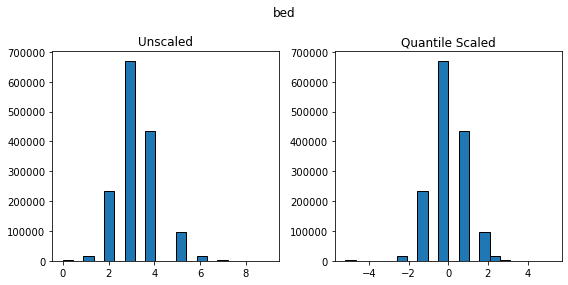

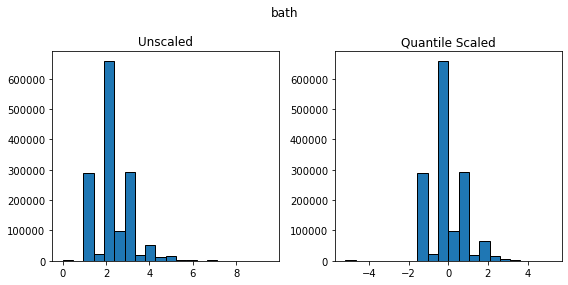

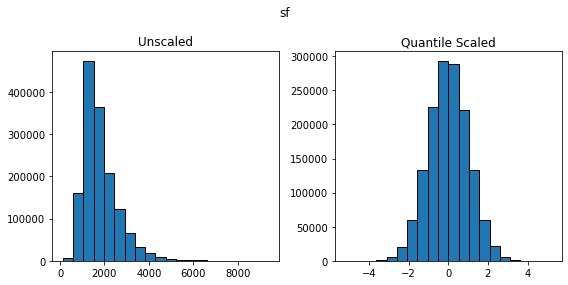

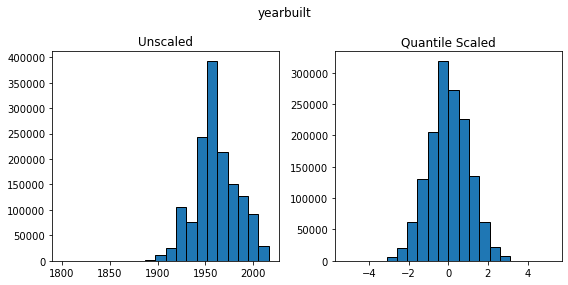

In [11]:
#QUANTILE SCALER - using normal output_distribution
scaler = QuantileTransformer(output_distribution='normal')
#Fit and transform train
X_tr_q_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

for c in X_tr.columns:
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(c)
    plt.subplot(1,2,1)
    plt.hist(X_tr[c],bins=20,ec='k')
    plt.title('Unscaled')
    plt.subplot(1,2,2)
    plt.hist(X_tr_q_scaled[c],bins=20,ec='k')
    plt.title('Quantile Scaled')
    plt.tight_layout()

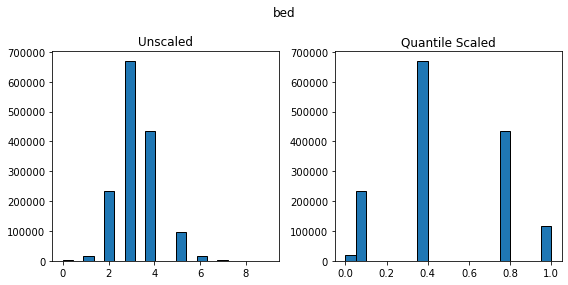

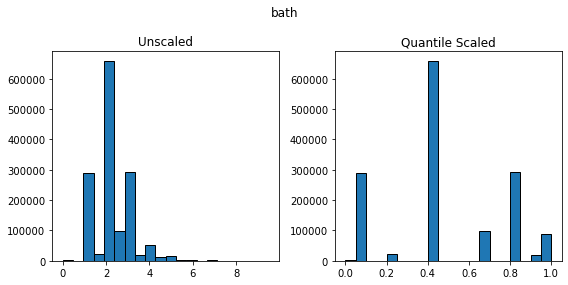

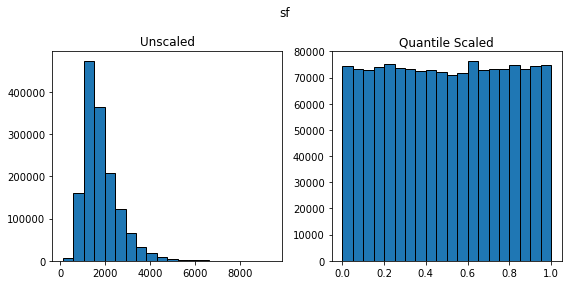

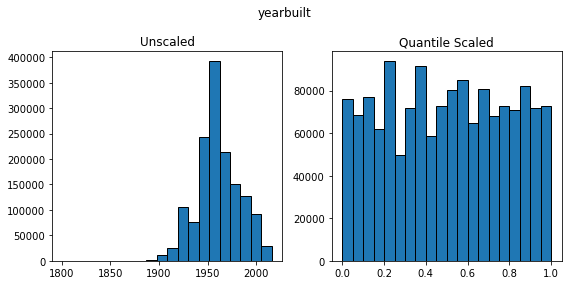

In [12]:
#QUANTILE SCALER - using output_distribution default of 'uniform'
scaler = QuantileTransformer()
#Fit and transform train
X_tr_q_scaled = pd.DataFrame(scaler.fit_transform(X_tr),columns=['bed', 'bath', 'sf', 'yearbuilt'],index=X_tr.index)
##################

for c in X_tr.columns:
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(c)
    plt.subplot(1,2,1)
    plt.hist(X_tr[c],bins=20,ec='k')
    plt.title('Unscaled')
    plt.subplot(1,2,2)
    plt.hist(X_tr_q_scaled[c],bins=20,ec='k')
    plt.title('Quantile Scaled')
    plt.tight_layout()

#### Scaling for Zillow dropped into wrangle.py

#### Test the function

In [13]:
from wrangle import scale_zillow

In [14]:
help(scale_zillow)

Help on function scale_zillow in module wrangle:

scale_zillow(tr, te, val, **kwargs)
    Takes prepped tr, test, validate zillow subsets. Scales the non-categorical independent variables and       returns dataframes of the same structure.  Expects pandas dataframes with the following columns,           in order: cols = ['value', 'county', 'bed', 'bath', 'sf', 'yearbuilt', 'Orange_CA', 'Ventura_CA']
    
    Returns: 3 Pandas DataFrames (Train, Test, Validate)
    Inputs:
           (R) tr: train dataset
           (R) te: test dataset
          (R) val: validate dataset
      (O-kw) kind: Type of scaler you want to use.  Default: minmax
                Options: minmax, standard, robust



In [15]:
#Test default/wrong input
tr_mm, te_mm, val_mm = scale_zillow(tr,te,val,kind='wrongword')

Invalid entry for "kind", default MinMax scaler used


In [16]:
tr.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1470497.0,400360.730018,316063.638328,22.0,186476.0,322967.0,518000.0,1999995.0
bed,1470497.0,3.280409,0.909302,0.0,3.0,3.0,4.0,9.0
bath,1470497.0,2.191538,0.896998,0.0,2.0,2.0,3.0,9.5
sf,1470497.0,1805.359228,803.920709,120.0,1251.0,1610.0,2167.0,9398.0
yearbuilt,1470497.0,1960.669293,21.899704,1801.0,1949.0,1958.0,1975.0,2016.0
Orange_CA,1470497.0,0.257775,0.437410,0.0,0.0,0.0,1.0,1.0
Ventura_CA,1470497.0,0.076901,0.266434,0.0,0.0,0.0,0.0,1.0


In [17]:
tr_mm.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1470497.0,400360.730018,316063.638328,22.0,186476.000000,322967.000000,518000.000000,1999995.0
bed,1470497.0,0.364490,0.101034,0.0,0.333333,0.333333,0.444444,1.0
bath,1470497.0,0.230688,0.094421,0.0,0.210526,0.210526,0.315789,1.0
sf,1470497.0,0.181651,0.086648,0.0,0.121901,0.160595,0.220629,1.0
yearbuilt,1470497.0,0.742648,0.101859,0.0,0.688372,0.730233,0.809302,1.0
Orange_CA,1470497.0,0.257775,0.437410,0.0,0.000000,0.000000,1.000000,1.0
Ventura_CA,1470497.0,0.076901,0.266434,0.0,0.000000,0.000000,0.000000,1.0


In [18]:
#Test standard scaler
tr_st, te_st, val_st = scale_zillow(tr,te,val,kind='standard')

In [19]:
tr_st.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1470497.0,4.003607e+05,316063.638328,22.000000,186476.000000,322967.000000,518000.000000,1.999995e+06
bed,1470497.0,1.211792e-15,1.000000,-3.607613,-0.308378,-0.308378,0.791367,6.290092e+00
bath,1470497.0,1.473008e-15,1.000000,-2.443192,-0.213532,-0.213532,0.901298,8.147692e+00
sf,1470497.0,3.475177e-17,1.000000,-2.096425,-0.689570,-0.243008,0.449846,9.444518e+00
yearbuilt,1470497.0,-7.152262e-16,1.000000,-7.290936,-0.532852,-0.121887,0.654379,2.526551e+00
Orange_CA,1470497.0,2.577754e-01,0.437410,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Ventura_CA,1470497.0,7.690053e-02,0.266434,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [20]:
#Test stanrobustdard scaler
tr_r, te_r, val_r = scale_zillow(tr,te,val,kind='robust')

In [21]:
tr_r.describe().T

,count,mean,std,min,25%,50%,75%,max
value,1470497.0,400360.730018,316063.638328,22.000000,186476.000000,322967.0,518000.000000,1.999995e+06
bed,1470497.0,0.280409,0.909302,-3.000000,0.000000,0.0,1.000000,6.000000e+00
bath,1470497.0,0.191538,0.896998,-2.000000,0.000000,0.0,1.000000,7.500000e+00
sf,1470497.0,0.213274,0.877643,-1.626638,-0.391921,0.0,0.608079,8.502183e+00
yearbuilt,1470497.0,0.102665,0.842296,-6.038462,-0.346154,0.0,0.653846,2.230769e+00
Orange_CA,1470497.0,0.257775,0.437410,0.000000,0.000000,0.0,1.000000,1.000000e+00
Ventura_CA,1470497.0,0.076901,0.266434,0.000000,0.000000,0.0,0.000000,1.000000e+00
